In [1]:
## Import libraries

In [2]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)
library(stringr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
# It is important to emphasize that some samples do not have timestamps because it is not provided 
# for 'scheduled' status. But, I dont know its reason.

In [4]:
df_log <- read.csv(file = 'events.csv', sep = ',', stringsAsFactors = FALSE)
#df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp, origin="1970-01-01")
df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp,format='%Y-%m-%dT%H:%M:%SZ', tzone = "UTC")
df_log$timestamp <- ymd_hms(df_log$creation_timestamp) + hours(2)
df_log$timestamp[is.na(df_log$timestamp)] <- Inf

df_log <- df_log %>%
  #arrange(creation_timestamp) %>%
  group_by(uid) %>%
  mutate(min_timestamp = min(timestamp)) %>%
  ungroup()
summary(df_log)
str(df_log)
head(df_log)

     uid                name           function_name     
 Length:147         Length:147         Length:147        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 creation_timestamp            first_timestamp    last_timestamp    
 Min.   :2021-07-15 14:42:54   Length:147         Length:147        
 1st Qu.:2021-07-15 14:43:27   Class :character   Class :character  
 Median :2021-07-15 14:44:19   Mode  :character   Mode  :character  
 Mean   :2021-07-15 14:45:28                                        
 3rd Qu.:2021-07-15 14:46:30                                        
 Max.   :2021-07-15 14:58:40                                        
    reason              node             message         
 Length:147         Length:147         Length:147    

tibble [147 × 11] (S3: tbl_df/tbl/data.frame)
 $ uid               : chr [1:147] "13290cec-b31f-4c01-9215-d81d54fe5b77" "1b5f8a6b-3161-4e8a-8762-32f07bf6fce9" "d02b83a1-242e-4429-9af0-93c391175ed4" "48dd6bae-0aca-4971-857d-55b4044cd17d" ...
 $ name              : chr [1:147] "wskow-invoker-00-4-guest-floatoperation1" "wskow-invoker-00-5-guest-floatoperation2" "wskow-invoker-00-6-guest-floatoperation3" "wskow-invoker-00-7-guest-linpack1" ...
 $ function_name     : chr [1:147] "floatoperation1" "floatoperation2" "floatoperation3" "linpack1" ...
 $ creation_timestamp: POSIXct[1:147], format: "2021-07-15 14:42:54" "2021-07-15 14:42:54" ...
 $ first_timestamp   : chr [1:147] "" "" "" "" ...
 $ last_timestamp    : chr [1:147] "" "" "" "" ...
 $ reason            : chr [1:147] "Scheduled" "Scheduled" "Scheduled" "Scheduled" ...
 $ node              : chr [1:147] "paranoia-8.rennes.grid5000.fr" "paranoia-8.rennes.grid5000.fr" "paranoia-2.rennes.grid5000.fr" "paranoia-2.rennes.grid5000.fr" ...


uid                                  name                                    
1 13290cec-b31f-4c01-9215-d81d54fe5b77 wskow-invoker-00-4-guest-floatoperation1
2 1b5f8a6b-3161-4e8a-8762-32f07bf6fce9 wskow-invoker-00-5-guest-floatoperation2
3 d02b83a1-242e-4429-9af0-93c391175ed4 wskow-invoker-00-6-guest-floatoperation3
4 48dd6bae-0aca-4971-857d-55b4044cd17d wskow-invoker-00-7-guest-linpack1       
5 13290cec-b31f-4c01-9215-d81d54fe5b77 wskow-invoker-00-4-guest-floatoperation1
6 1b5f8a6b-3161-4e8a-8762-32f07bf6fce9 wskow-invoker-00-5-guest-floatoperation2
  function_name   creation_timestamp  first_timestamp      last_timestamp      
1 floatoperation1 2021-07-15 14:42:54                                          
2 floatoperation2 2021-07-15 14:42:54                                          
3 floatoperation3 2021-07-15 14:42:55                                          
4 linpack1        2021-07-15 14:42:55                                          
5 floatoperation1 2021-07-15 14:42:56 2021-07-15T14:42:56Z 2021-07-15T14:42:56Z
6 floatoperation2 2021-07-15 14:42:56 2021-07-15T14:42:56Z 2021-07-15T14:42:56Z
  reason    node                         
1 Scheduled paranoia-8.rennes.grid5000.fr
2 Scheduled paranoia-8.rennes.grid5000.fr
3 Scheduled paranoia-2.rennes.grid5000.fr
4 Scheduled paranoia-2.rennes.grid5000.fr
5 Pulling   paranoia-8.rennes.grid5000.fr
6 Pulling   paranoia-8.rennes.grid5000.fr
  message                                                                                                  
1 Successfully assigned openwhisk/wskow-invoker-00-4-guest-floatoperation1 to paranoia-8.rennes.grid5000.fr
2 Successfully assigned openwhisk/wskow-invoker-00-5-guest-floatoperation2 to paranoia-8.rennes.grid5000.fr
3 Successfully assigned openwhisk/wskow-invoker-00-6-guest-floatoperation3 to paranoia-2.rennes.grid5000.fr
4 Successfully assigned openwhisk/wskow-invoker-00-7-guest-linpack1 to paranoia-2.rennes.grid5000.fr       
5 Pulling image "openwhisk/python3action:1.15.0"                                                           
6 Pulling image "openwhisk/python3action:1.15.0"                                                           
  timestamp           min_timestamp      
1 2021-07-15 16:42:54 2021-07-15 16:42:54
2 2021-07-15 16:42:54 2021-07-15 16:42:54
3 2021-07-15 16:42:55 2021-07-15 16:42:55
4 2021-07-15 16:42:55 2021-07-15 16:42:55
5 2021-07-15 16:42:56 2021-07-15 16:42:54
6 2021-07-15 16:42:56 2021-07-15 16:42:54

In [5]:
df_activations <- read.csv(file = 'activations.csv', sep = ',', stringsAsFactors = FALSE)
df_activations$timestamp <- ymd_hms(as.POSIXct(df_activations$timestamp, origin="1970-01-01"))
summary(df_activations)
str(df_activations)

  object_uid        object_name        function_name         duration        
 Length:88          Length:88          Length:88          Min.   :  0.00998  
 Class :character   Class :character   Class :character   1st Qu.:  0.03914  
 Mode  :character   Mode  :character   Mode  :character   Median :  1.10791  
                                                          Mean   : 18.68377  
                                                          3rd Qu.:  6.31607  
                                                          Max.   :296.03821  
                                                          NA's   :46         
   timestamp                      reason            node         message       
 Min.   :2021-07-15 16:43:13   Length:88          Mode:logical   Mode:logical  
 1st Qu.:2021-07-15 16:43:41   Class :character   NA's:88        NA's:88       
 Median :2021-07-15 16:46:07   Mode  :character                                
 Mean   :2021-07-15 16:45:48                            

'data.frame':	88 obs. of  8 variables:
 $ object_uid   : chr  "0adff090f21447069ff090f214270602" "0adff090f21447069ff090f214270602" "0adff090f21447069ff090f214270602" "0adff090f21447069ff090f214270602" ...
 $ object_name  : chr  "rnngenerate2" "rnngenerate2" "rnngenerate2" "rnngenerate2" ...
 $ function_name: chr  "rnngenerate2" "rnngenerate2" "rnngenerate2" "rnngenerate2" ...
 $ duration     : num  0.0313 0.0337 NA NA 0.0326 ...
 $ timestamp    : POSIXct, format: NA NA ...
 $ reason       : chr  "download_data" "function_execution" "finishing_time" "starting_time" ...
 $ node         : logi  NA NA NA NA NA NA ...
 $ message      : logi  NA NA NA NA NA NA ...


In [6]:
####################################

In [7]:
# Timestamp analysis

In [8]:
####################################

In [9]:
### Filter the events file

In [10]:
df_filtered <- df_log %>%
    filter(
      reason == 'Scheduled' |
      reason == 'Pulling' |
      reason == 'Pulled' |
      reason == 'Created' |
      reason == 'Started' |
      reason == 'Killing')

df_selected <- df_filtered %>%
    select(-name, -uid, -message, -min_timestamp, -first_timestamp, -last_timestamp, -creation_timestamp)
summary(df_selected)

 function_name         reason              node          
 Length:147         Length:147         Length:147        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-07-15 16:42:54  
 1st Qu.:2021-07-15 16:43:27  
 Median :2021-07-15 16:44:19  
 Mean   :2021-07-15 16:45:28  
 3rd Qu.:2021-07-15 16:46:30  
 Max.   :2021-07-15 16:58:40  

In [11]:
### Process the events durations

In [12]:
df_spread <- df_selected %>%
    group_by_at(vars(-timestamp)) %>%
    mutate(sample_id = row_number()) %>% ungroup() %>%
    spread(reason, timestamp) %>%
    select(-sample_id) #%>%

print(df_spread)
df_processed <- df_spread

# A tibble: 41 x 8
   function_name   node                  Created             Killing            
   <chr>           <chr>                 <dttm>              <dttm>             
 1 chameleon2      paranoia-8.rennes.gr… 2021-07-15 16:43:24 2021-07-15 16:44:44
 2 chameleon2      paranoia-8.rennes.gr… NA                  2021-07-15 16:44:44
 3 chameleon3      paranoia-2.rennes.gr… 2021-07-15 16:43:38 2021-07-15 16:58:40
 4 chameleon3      paranoia-2.rennes.gr… NA                  2021-07-15 16:58:40
 5 facedetection1  paranoia-8.rennes.gr… 2021-07-15 16:46:39 NA                 
 6 facedetection2  paranoia-8.rennes.gr… 2021-07-15 16:47:14 NA                 
 7 facedetection3  paranoia-8.rennes.gr… 2021-07-15 16:48:19 NA                 
 8 floatoperation1 paranoia-8.rennes.gr… 2021-07-15 16:43:12 2021-07-15 16:43:22
 9 floatoperation1 paranoia-8.rennes.gr… NA                  2021-07-15 16:43:22
10 floatoperation2 paranoia-8.rennes.gr… 2021-07-15 16:43:12 2021-07-15 16:43:23
# … with 

In [13]:
### Filter the activations file

In [14]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        timestamp,
        reason,
        node,
        object_uid) %>%
    drop_na(timestamp)
        #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

 function_name        timestamp                      reason         
 Length:46          Min.   :2021-07-15 16:43:13   Length:46         
 Class :character   1st Qu.:2021-07-15 16:43:41   Class :character  
 Mode  :character   Median :2021-07-15 16:46:07   Mode  :character  
                    Mean   :2021-07-15 16:45:48                     
                    3rd Qu.:2021-07-15 16:47:58                     
                    Max.   :2021-07-15 16:51:18                     
   node          object_uid       
 Mode:logical   Length:46         
 NA's:46        Class :character  
                Mode  :character  
                                  
                                  
                                  

In [15]:
### First view of activations

In [16]:
head(df_activations_selected)

function_name  timestamp           reason         node
1 rnngenerate2   2021-07-15 16:48:40 finishing_time NA  
2 rnngenerate2   2021-07-15 16:48:40 starting_time  NA  
3 rnngenerate3   2021-07-15 16:48:25 finishing_time NA  
4 rnngenerate3   2021-07-15 16:48:25 starting_time  NA  
5 facedetection3 2021-07-15 16:51:18 finishing_time NA  
6 facedetection3 2021-07-15 16:48:21 starting_time  NA  
  object_uid                      
1 0adff090f21447069ff090f214270602
2 0adff090f21447069ff090f214270602
3 dcd0711a8d714f3b90711a8d71ff3bec
4 dcd0711a8d714f3b90711a8d71ff3bec
5 863a403577f543caba403577f5f3ca88
6 863a403577f543caba403577f5f3ca88

function_name  timestamp           reason         node
1 rnngenerate2   2021-07-15 16:48:40 finishing_time NA  
2 rnngenerate2   2021-07-15 16:48:40 starting_time  NA  
3 rnngenerate3   2021-07-15 16:48:25 finishing_time NA  
4 rnngenerate3   2021-07-15 16:48:25 starting_time  NA  
5 facedetection3 2021-07-15 16:51:18 finishing_time NA  
6 facedetection3 2021-07-15 16:48:21 starting_time  NA  
  object_uid                      
1 0adff090f21447069ff090f214270602
2 0adff090f21447069ff090f214270602
3 dcd0711a8d714f3b90711a8d71ff3bec
4 dcd0711a8d714f3b90711a8d71ff3bec
5 863a403577f543caba403577f5f3ca88
6 863a403577f543caba403577f5f3ca88

Saving 6.67 x 6.67 in image



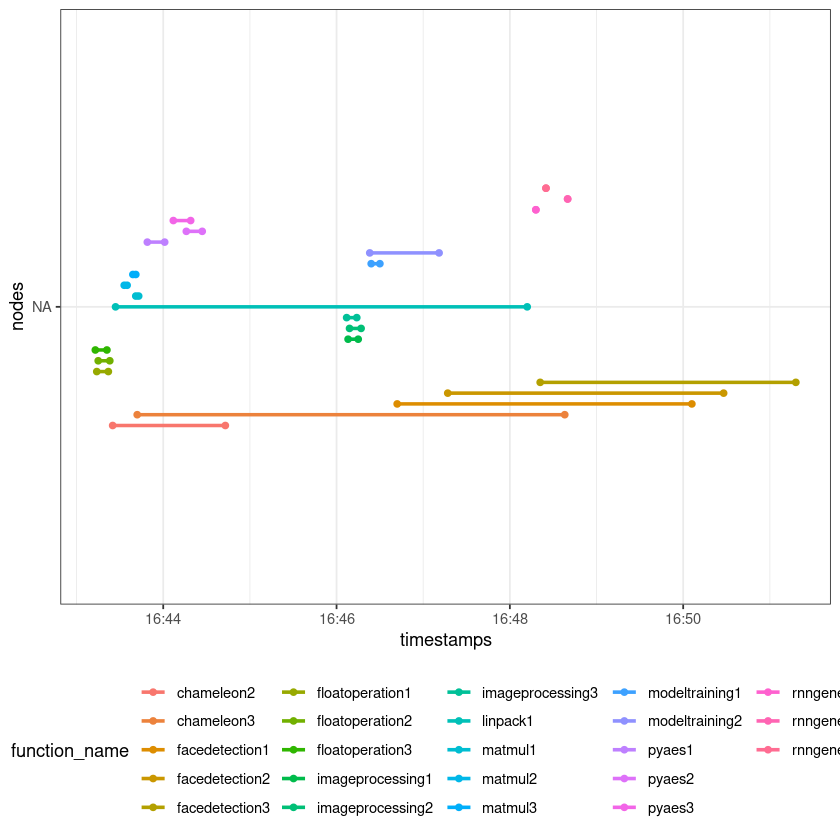

In [17]:
df_plot <- df_activations_selected #%>% drop_na(timestamp)
head(df_plot)
ggplot(data = df_plot, aes(x = node, 
                           #y = as.POSIXct(timestamp, origin = "1970-01-01"), 
                           y = timestamp,
                           color = function_name,
                           #shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +

labs(x = "nodes", y = "timestamps", color = "function_name") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   theme(legend.position="bottom") +
   ggsave('full_line_plot_filtered.png')

In [18]:
### Spread the timestamps of activations by categories

In [19]:
df_activations_selected <- df_activations %>%
    select(
       function_name,
       timestamp,
       reason) %>%
    drop_na()
    #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

df_spread_activations <- df_activations_selected %>%
   group_by_at(vars(-timestamp)) %>%
   mutate(sample_id = row_number()) %>% ungroup() %>%
   spread(reason, timestamp) %>%
   select(-sample_id)

head(df_spread_activations)
tail(df_spread_activations)

 function_name        timestamp                      reason         
 Length:46          Min.   :2021-07-15 16:43:13   Length:46         
 Class :character   1st Qu.:2021-07-15 16:43:41   Class :character  
 Mode  :character   Median :2021-07-15 16:46:07   Mode  :character  
                    Mean   :2021-07-15 16:45:48                     
                    3rd Qu.:2021-07-15 16:47:58                     
                    Max.   :2021-07-15 16:51:18                     

function_name   finishing_time      starting_time      
1 chameleon2      2021-07-15 16:44:43 2021-07-15 16:43:25
2 chameleon3      2021-07-15 16:48:38 2021-07-15 16:43:42
3 facedetection1  2021-07-15 16:50:06 2021-07-15 16:46:42
4 facedetection2  2021-07-15 16:50:28 2021-07-15 16:47:17
5 facedetection3  2021-07-15 16:51:18 2021-07-15 16:48:21
6 floatoperation1 2021-07-15 16:43:22 2021-07-15 16:43:14

function_name finishing_time      starting_time      
1 pyaes1        2021-07-15 16:44:01 2021-07-15 16:43:49
2 pyaes2        2021-07-15 16:44:27 2021-07-15 16:44:16
3 pyaes3        2021-07-15 16:44:19 2021-07-15 16:44:07
4 rnngenerate1  2021-07-15 16:48:18 2021-07-15 16:48:18
5 rnngenerate2  2021-07-15 16:48:40 2021-07-15 16:48:40
6 rnngenerate3  2021-07-15 16:48:25 2021-07-15 16:48:25

In [20]:
### Merge the activations and events data

In [21]:
df_events_to_join <- df_processed #%>% mutate(id = row_number())
head(df_events_to_join)
df_activations_to_join <- df_spread_activations #%>% mutate(id = row_number())
head(df_activations_to_join)

df_all <- full_join(
   df_events_to_join,
   df_activations_to_join,
   by="function_name") #%>%
   #distinct()
#df_all[is.na(df_all)] = 0
summary(df_all)

df_gathered <- df_all %>%
    gather(
        factor_key = 'TRUE',
        key = 'reason',
        value = 'timestamp',
        -function_name, -node) 

df_gathered$reason <- str_replace_all(df_gathered$reason, 'Scheduled', '00_pod_scheduled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulling', '01_container_pulling')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulled', '02_container_pulled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Created', '03_container_created')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Started', '04_container_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'starting_time', '05_function_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'finishing_time', '06_function_finished')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Killing', '07_finishing_container')

head(df_gathered)
summary(df_gathered)

function_name  node                          Created            
1 chameleon2     paranoia-8.rennes.grid5000.fr 2021-07-15 16:43:24
2 chameleon2     paranoia-8.rennes.grid5000.fr <NA>               
3 chameleon3     paranoia-2.rennes.grid5000.fr 2021-07-15 16:43:38
4 chameleon3     paranoia-2.rennes.grid5000.fr <NA>               
5 facedetection1 paranoia-8.rennes.grid5000.fr 2021-07-15 16:46:39
6 facedetection2 paranoia-8.rennes.grid5000.fr 2021-07-15 16:47:14
  Killing             Pulled              Pulling            
1 2021-07-15 16:44:44 2021-07-15 16:43:21 2021-07-15 16:42:58
2 2021-07-15 16:44:44 <NA>                <NA>               
3 2021-07-15 16:58:40 2021-07-15 16:43:35 2021-07-15 16:43:25
4 2021-07-15 16:58:40 <NA>                <NA>               
5 <NA>                2021-07-15 16:46:38 2021-07-15 16:46:31
6 <NA>                2021-07-15 16:47:14 <NA>               
  Scheduled           Started            
1 2021-07-15 16:42:56 2021-07-15 16:43:24
2 <NA>                <NA>               
3 2021-07-15 16:43:21 2021-07-15 16:43:39
4 <NA>                <NA>               
5 2021-07-15 16:46:30 2021-07-15 16:46:40
6 2021-07-15 16:47:12 2021-07-15 16:47:14

function_name   finishing_time      starting_time      
1 chameleon2      2021-07-15 16:44:43 2021-07-15 16:43:25
2 chameleon3      2021-07-15 16:48:38 2021-07-15 16:43:42
3 facedetection1  2021-07-15 16:50:06 2021-07-15 16:46:42
4 facedetection2  2021-07-15 16:50:28 2021-07-15 16:47:17
5 facedetection3  2021-07-15 16:51:18 2021-07-15 16:48:21
6 floatoperation1 2021-07-15 16:43:22 2021-07-15 16:43:14

 function_name          node              Created                   
 Length:41          Length:41          Min.   :2021-07-15 16:43:12  
 Class :character   Class :character   1st Qu.:2021-07-15 16:43:34  
 Mode  :character   Mode  :character   Median :2021-07-15 16:44:13  
                                       Mean   :2021-07-15 16:45:16  
                                       3rd Qu.:2021-07-15 16:46:30  
                                       Max.   :2021-07-15 16:48:32  
                                       NA's   :18                   
    Killing                        Pulled                   
 Min.   :2021-07-15 16:43:21   Min.   :2021-07-15 16:43:09  
 1st Qu.:2021-07-15 16:43:41   1st Qu.:2021-07-15 16:43:32  
 Median :2021-07-15 16:44:44   Median :2021-07-15 16:44:06  
 Mean   :2021-07-15 16:46:34   Mean   :2021-07-15 16:45:14  
 3rd Qu.:2021-07-15 16:47:01   3rd Qu.:2021-07-15 16:46:29  
 Max.   :2021-07-15 16:58:40   Max.   :2021-07-15 16:48:30  
 NA's   :3           

function_name  node                          reason              
1 chameleon2     paranoia-8.rennes.grid5000.fr 03_container_created
2 chameleon2     paranoia-8.rennes.grid5000.fr 03_container_created
3 chameleon3     paranoia-2.rennes.grid5000.fr 03_container_created
4 chameleon3     paranoia-2.rennes.grid5000.fr 03_container_created
5 facedetection1 paranoia-8.rennes.grid5000.fr 03_container_created
6 facedetection2 paranoia-8.rennes.grid5000.fr 03_container_created
  timestamp          
1 2021-07-15 16:43:24
2 <NA>               
3 2021-07-15 16:43:38
4 <NA>               
5 2021-07-15 16:46:39
6 2021-07-15 16:47:14

 function_name          node              reason         
 Length:328         Length:328         Length:328        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-07-15 16:42:54  
 1st Qu.:2021-07-15 16:43:33  
 Median :2021-07-15 16:44:27  
 Mean   :2021-07-15 16:45:27  
 3rd Qu.:2021-07-15 16:46:30  
 Max.   :2021-07-15 16:58:40  
 NA's   :99                   

In [22]:
df_plot <- df_gathered
summary(df_plot)


df_plot <- df_gathered %>% drop_na(timestamp)
summary(df_plot)
head(df_plot)
tail(df_plot)
print(df_plot)

 function_name          node              reason         
 Length:328         Length:328         Length:328        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-07-15 16:42:54  
 1st Qu.:2021-07-15 16:43:33  
 Median :2021-07-15 16:44:27  
 Mean   :2021-07-15 16:45:27  
 3rd Qu.:2021-07-15 16:46:30  
 Max.   :2021-07-15 16:58:40  
 NA's   :99                   

 function_name          node              reason         
 Length:229         Length:229         Length:229        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-07-15 16:42:54  
 1st Qu.:2021-07-15 16:43:33  
 Median :2021-07-15 16:44:27  
 Mean   :2021-07-15 16:45:27  
 3rd Qu.:2021-07-15 16:46:30  
 Max.   :2021-07-15 16:58:40  

function_name   node                          reason              
1 chameleon2      paranoia-8.rennes.grid5000.fr 03_container_created
2 chameleon3      paranoia-2.rennes.grid5000.fr 03_container_created
3 facedetection1  paranoia-8.rennes.grid5000.fr 03_container_created
4 facedetection2  paranoia-8.rennes.grid5000.fr 03_container_created
5 facedetection3  paranoia-8.rennes.grid5000.fr 03_container_created
6 floatoperation1 paranoia-8.rennes.grid5000.fr 03_container_created
  timestamp          
1 2021-07-15 16:43:24
2 2021-07-15 16:43:38
3 2021-07-15 16:46:39
4 2021-07-15 16:47:14
5 2021-07-15 16:48:19
6 2021-07-15 16:43:12

function_name node                          reason             
1 pyaes3        paranoia-8.rennes.grid5000.fr 05_function_started
2 pyaes3        paranoia-8.rennes.grid5000.fr 05_function_started
3 rnngenerate1  paranoia-2.rennes.grid5000.fr 05_function_started
4 rnngenerate2  paranoia-2.rennes.grid5000.fr 05_function_started
5 rnngenerate2  paranoia-2.rennes.grid5000.fr 05_function_started
6 rnngenerate3  paranoia-2.rennes.grid5000.fr 05_function_started
  timestamp          
1 2021-07-15 16:44:07
2 2021-07-15 16:44:07
3 2021-07-15 16:48:18
4 2021-07-15 16:48:40
5 2021-07-15 16:48:40
6 2021-07-15 16:48:25

# A tibble: 229 x 4
   function_name    node                    reason           timestamp          
   <chr>            <chr>                   <chr>            <dttm>             
 1 chameleon2       paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:43:24
 2 chameleon3       paranoia-2.rennes.grid… 03_container_cr… 2021-07-15 16:43:38
 3 facedetection1   paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:46:39
 4 facedetection2   paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:47:14
 5 facedetection3   paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:48:19
 6 floatoperation1  paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:43:12
 7 floatoperation2  paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:43:12
 8 floatoperation3  paranoia-2.rennes.grid… 03_container_cr… 2021-07-15 16:43:12
 9 imageprocessing1 paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:46:06
10 imageprocessing2 paranoia-8.rennes.grid… 03_container_cr… 2021-07-15 16:46:06
# … with

In [23]:
### Plot the merged data

Saving 6.67 x 6.67 in image



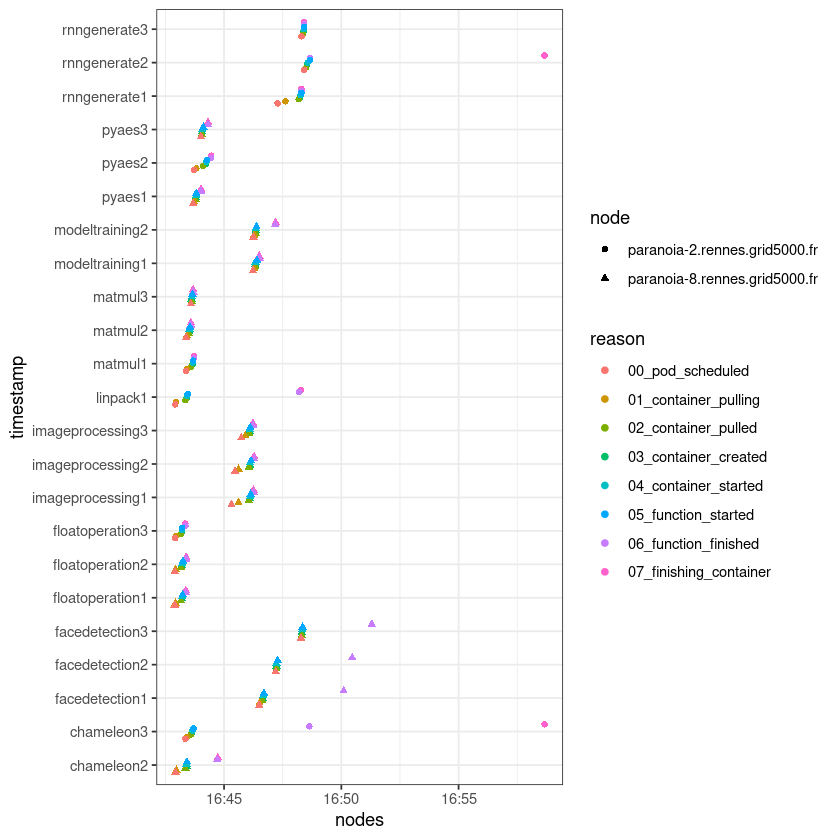

In [24]:
ggplot(data = df_plot, aes(x = timestamp, 
                           y = function_name, 
                           color = reason,
                           shape = node)) +
                           #group = function_name)) + #, color = node)) +
    #geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    #coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="right") +
       ggsave('full_line_plot_phases.png')

Saving 6.67 x 6.67 in image

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 79 rows containing missing values (geom_point).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 79 rows containing missing values (geom_point).”


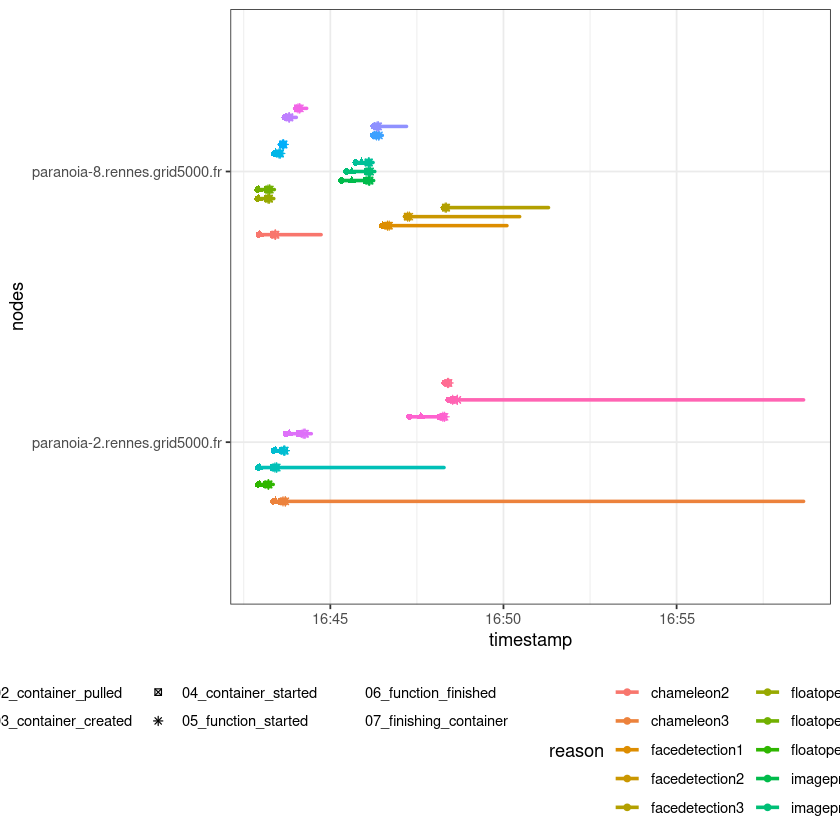

In [25]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_phases.png')

Saving 6.67 x 6.67 in image



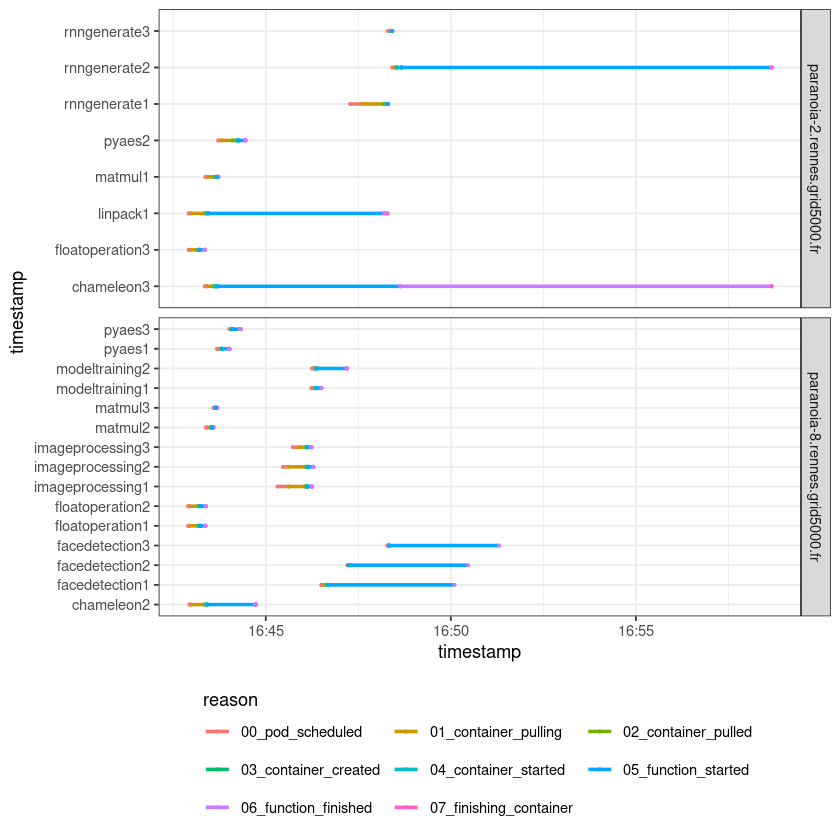

In [26]:
ggplot(data = df_plot, aes(x = timestamp, 
                           y = function_name, 
                           color = reason,
                          group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.7)) + 
    geom_point(size = 0.5, position = position_dodge(width = 0.7)) +
    facet_grid(node ~ ., scale="free_y") +
    labs(x = "timestamp", y = "timestamp", color = "reason") +
    scale_fill_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom") +
    guides(colour=guide_legend(nrow=3,byrow=TRUE, title.position = "top")) +
    ggsave('full_line_plot_phases.png')

In [33]:
a <- df_plot %>% filter(function_name == 'rnngenerate1' | function_name == 'rnngenerate2' |
                       function_name == 'rnngenerate3')
head(a)
tail(a)

function_name node                          reason                
1 rnngenerate1  paranoia-2.rennes.grid5000.fr 03_container_created  
2 rnngenerate2  paranoia-2.rennes.grid5000.fr 03_container_created  
3 rnngenerate3  paranoia-2.rennes.grid5000.fr 03_container_created  
4 rnngenerate1  paranoia-2.rennes.grid5000.fr 07_finishing_container
5 rnngenerate2  paranoia-2.rennes.grid5000.fr 07_finishing_container
6 rnngenerate2  paranoia-2.rennes.grid5000.fr 07_finishing_container
  timestamp          
1 2021-07-15 16:48:15
2 2021-07-15 16:48:32
3 2021-07-15 16:48:23
4 2021-07-15 16:48:18
5 2021-07-15 16:58:40
6 2021-07-15 16:58:40

function_name node                          reason              
1 rnngenerate2  paranoia-2.rennes.grid5000.fr 06_function_finished
2 rnngenerate3  paranoia-2.rennes.grid5000.fr 06_function_finished
3 rnngenerate1  paranoia-2.rennes.grid5000.fr 05_function_started 
4 rnngenerate2  paranoia-2.rennes.grid5000.fr 05_function_started 
5 rnngenerate2  paranoia-2.rennes.grid5000.fr 05_function_started 
6 rnngenerate3  paranoia-2.rennes.grid5000.fr 05_function_started 
  timestamp          
1 2021-07-15 16:48:40
2 2021-07-15 16:48:25
3 2021-07-15 16:48:18
4 2021-07-15 16:48:40
5 2021-07-15 16:48:40
6 2021-07-15 16:48:25

Saving 6.67 x 6.67 in image



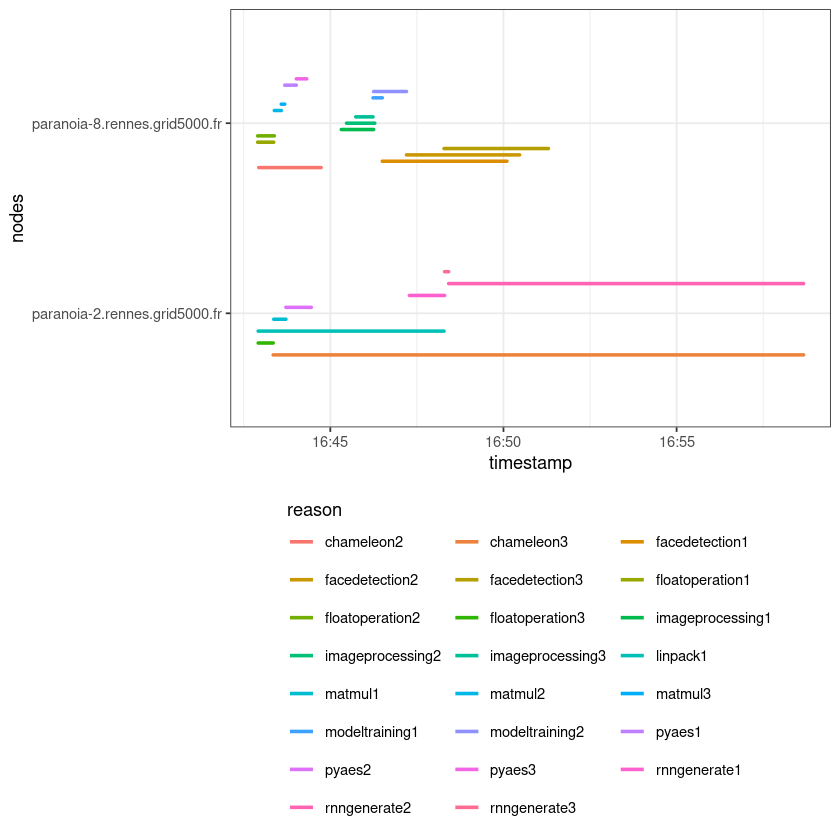

In [29]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
        guides(colour=guide_legend(ncol=3,byrow=TRUE, title.position = "top")) +
       ggsave('full_line_plot_without_phases.png')

In [28]:
#summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '05_function_started' | reason == '06_function_finished')
#summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
       guides(colour = guide_legend(title.position = "right"))                    group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.3)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
    theme(legend.position = "bottom") +
    guides(colour=guide_legend(nrow=6,byrow=TRUE, title.position = "top")) +
       ggsave('full_line_plot_functions_execution.png')

ERROR: Error in parse(text = x, srcfile = src): <text>:7:83: unexpected symbol
6:                            color = function_name,
7:        guides(colour = guide_legend(title.position = "right"))                    group
                                                                                     ^


In [ ]:
summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '04_container_started' | reason == '05_function_started')
summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot2.png')

In [ ]:
a <- df_plot %>% filter(function_name == 'facedetection3')
print(a)